## Import lib

In [4]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras import Sequential, layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [6]:
df = pd.read_csv('smoking.csv')
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


##  DATA PREPROCESSING (ENCODING CLEANING)

In [8]:
df.isna().sum()
# Drop kolom yang tidak akan diapakai untuk prediksi
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df["amt_weekends"].fillna(df["amt_weekends"].mode()[0], inplace=True)
df["amt_weekdays"].fillna(df["amt_weekdays"].mode()[0], inplace=True)
df["type"].fillna(df["type"].mode()[0], inplace=True)


# Encode kolom yang kategorikal
min_max_scaler = MinMaxScaler()
df[['age', 'amt_weekends', 'amt_weekdays']] = min_max_scaler.fit_transform(df[['age', 'amt_weekends', 'amt_weekdays']])

col = ['gender', 'marital_status','highest_qualification','nationality', 'ethnicity', 'region', 'type', 'gross_income', 'smoke']
le=LabelEncoder()
for i in col:
    df[i]=le.fit_transform(df[i])
df.head(10)

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,0.271605,0,5,0,6,2,5,0,0.333333,0.363636,3
1,0,0.320988,3,5,0,6,8,5,1,0.200000,0.218182,3
2,1,0.296296,1,1,1,6,4,5,0,0.333333,0.363636,3
3,0,0.296296,1,1,1,6,0,5,0,0.333333,0.363636,3
4,0,0.283951,1,3,0,6,2,5,0,0.333333,0.363636,3
5,0,0.259259,1,3,0,6,1,5,0,0.333333,0.363636,3
6,1,0.456790,1,1,0,6,6,5,1,0.100000,0.109091,3
7,1,0.345679,3,1,1,6,0,5,0,0.333333,0.363636,3
8,1,0.296296,3,2,1,6,2,5,1,0.133333,0.145455,2
9,0,0.308642,1,5,1,6,5,5,1,0.250000,0.218182,3


##  MENGECEK KORELASI ANTAR KOLOM FEATURE

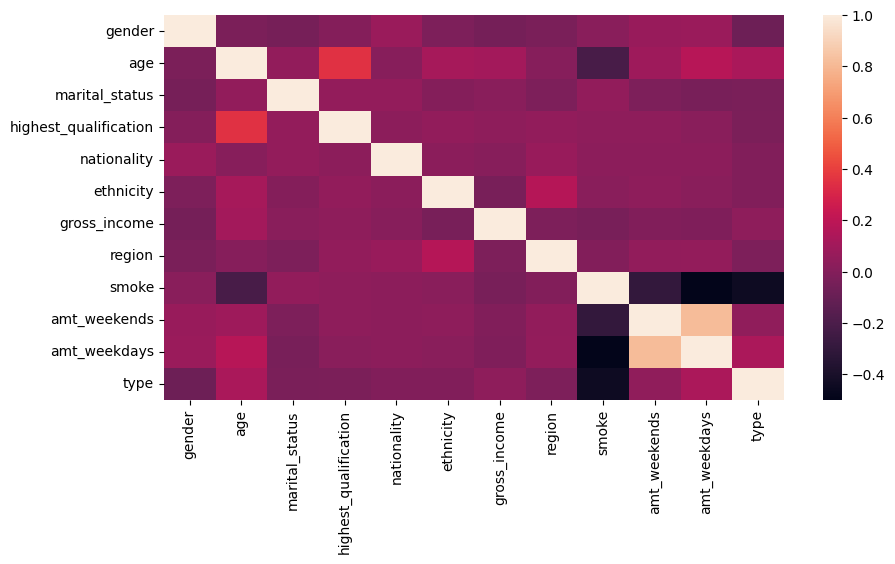

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr())
plt.show()

## SPLITTING DATA

In [15]:
# Memisahkan atribut dan label
X = df[['amt_weekends', 'amt_weekdays']]
y = df['smoke']

# Membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Membuat model neural network

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 625 (2.44 KB)
Trainable params: 625 (2.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile Model

In [18]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Fitting Model

In [20]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)

history = model.fit(
    x=X_train, 
    y=y_train, 
    epochs=100, 
    batch_size=16, 
    verbose=1, 
    validation_data=(X_test, y_test),
    callbacks=[callback]
)

Epoch 1/100
75/75 [==============================] - 1s 4ms/step - loss: 0.5918 - accuracy: 0.7576 - val_loss: 0.5456 - val_accuracy: 0.7422
Epoch 2/100
75/75 [==============================] - 0s 2ms/step - loss: 0.5184 - accuracy: 0.7576 - val_loss: 0.5250 - val_accuracy: 0.7422
Epoch 3/100
75/75 [==============================] - 0s 2ms/step - loss: 0.5018 - accuracy: 0.7576 - val_loss: 0.5059 - val_accuracy: 0.7422
Epoch 4/100
75/75 [==============================] - 0s 2ms/step - loss: 0.4789 - accuracy: 0.7794 - val_loss: 0.4751 - val_accuracy: 0.7812
Epoch 5/100
75/75 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.8213 - val_loss: 0.4386 - val_accuracy: 0.8164
Epoch 6/100
75/75 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8482 - val_loss: 0.4050 - val_accuracy: 0.8594
Epoch 7/100
75/75 [==============================] - 0s 2ms/step - loss: 0.3893 - accuracy: 0.8574 - val_loss: 0.3776 - val_accuracy: 0.8691
Epoch 8/100
7

In [24]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 1ms/step - loss: 0.1459 - accuracy: 0.9668


[0.14586395025253296, 0.966796875]

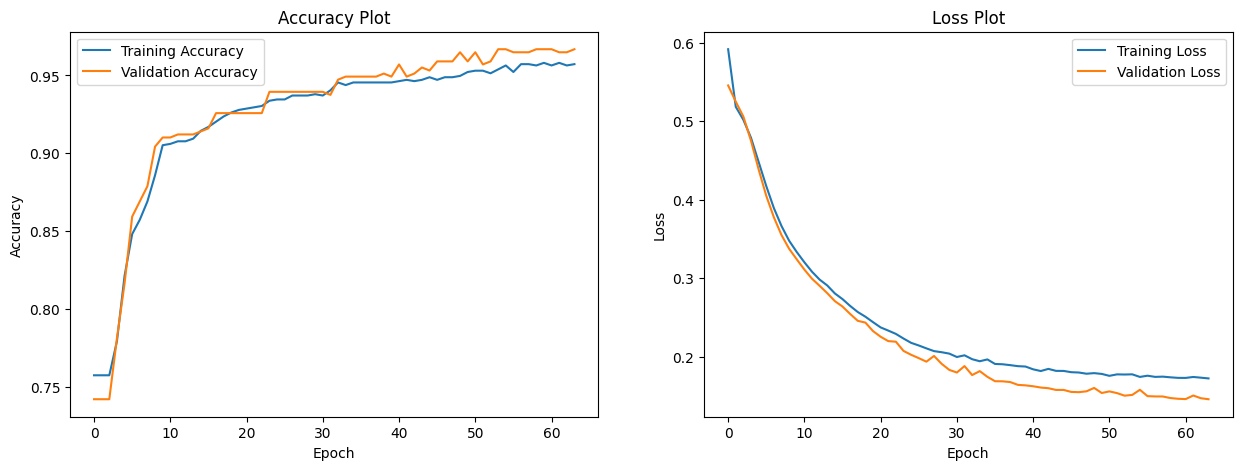

In [22]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()